## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

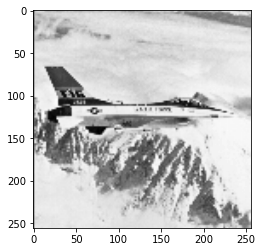

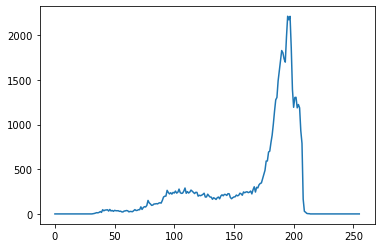

In [33]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate

jet = cv2.imread("jet.bmp",0)
hist = cv2.calcHist([jet],[0],None,[256],[0,256])


plt.imshow(jet,'gray')
plt.show()
plt.plot(hist)
plt.show()

In [34]:
def bbhe(img):
    
    xmn = np.mean(img) # Średnia jasność - wartość progu
    size = img.shape
    img_result = np.zeros_like(img)
    
    
    H1 = np.zeros((256, 1))     
    H2 = np.zeros((256, 1))
    C1 = np.zeros((256, 1))
    C2 = np.zeros((256, 1))


    for i in range(size[0]):
        for j in range(size[1]):
            if img[i, j] < xmn:
                H1[img[i, j] - 1] += 1
            else:
                H2[img[i, j] - 1] += 1
                
    C1 = np.cumsum(H1)
    C2 = np.cumsum(H1)
    
    C1 = C1/np.max(C1)
    C2 = C2/np.max(C2)

    C1n = C1 * xmn
    C2n = xmn + 1 + C2 * (255 - xmn -1)

    for i in range(size[0]):
        for j in range(size[1]):
            if img[i, j] <= xmn:
                t = img[i, j]
                img_result[i, j] = C1n[t - 1]
            else:
                t = img[i, j]
                img_result[i, j] = C2n[t - 1]

    return img_result

In [35]:
bbhe_img = bbhe(jet)

I_equ = cv2.equalizeHist(jet)

[]

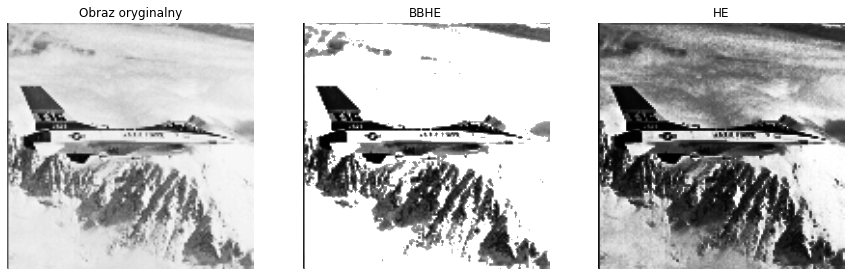

In [36]:
fig, axs = plt.subplots(1, 3)

fig.set_size_inches(15, 10)
axs[0].imshow(jet, 'gray')
axs[0].axis('off')
axs[0].set_title('Obraz oryginalny',)

axs[1].imshow(bbhe_img, 'gray')
axs[1].axis('off')
axs[1].set_title('BBHE')

axs[2].imshow(I_equ,'gray')
axs[2].axis('off')
axs[2].set_title('HE')
plt.plot()



Zwykłe wyrównanie histogramu HE ma tendencję do zmiany jasności obrazu. Bi-histogram equalization (BBHE) może zachować oryginalną jasność do pewnego zakresu. W wyniku widać zachowanie poziomu jasności na obrazie wyrównanym z użyciem BBHE, chociaż widoczne jest zgubienie ostrości obrazu. Aczkolwiek wynik HE zachował ostrość ale stracił na jasności obrazu.